In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

Using TensorFlow backend.


In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 输入数据为 mnist 数据集
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train / 255
x_test = x_test / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 24, 24, 6)         156       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 8, 16)          2416      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 16)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 120)               30840     
_________________________________________________________________
Dense2 (Dense)               (None, 84)               

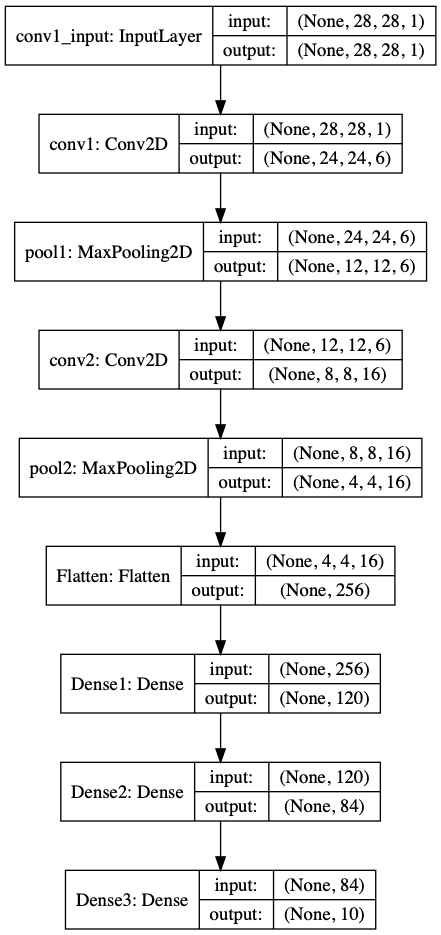

In [2]:
model = Sequential()
 
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), name="conv1"))
model.add(MaxPooling2D(pool_size=(2, 2), name="pool1")) 
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', name="conv2")) 
model.add(MaxPooling2D(pool_size=(2, 2), name="pool2")) 
model.add(Flatten(name="Flatten"))
model.add(Dense(120, activation='relu', name="Dense1")) 
model.add(Dense(84, activation='relu', name="Dense2")) 
model.add(Dense(10, activation='softmax', name="Dense3"))

model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

# 把模型保存为图片
from keras.utils import plot_model
plot_model(model,to_file='model_png/201LeNet.png', show_layer_names=True, show_shapes=True)

In [10]:
model.fit(x_train, y_train, batch_size=128, epochs=3, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 19s 311us/step - loss: 0.0641 - acc: 0.9803 - val_loss: 0.0530 - val_acc: 0.9828
Epoch 2/3
60000/60000 [==============================] - 20s 332us/step - loss: 0.0504 - acc: 0.9845 - val_loss: 0.0514 - val_acc: 0.9841
Epoch 3/3
60000/60000 [==============================] - 19s 322us/step - loss: 0.0404 - acc: 0.9874 - val_loss: 0.0365 - val_acc: 0.9877


In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test accuracy:', accuracy)

10000/10000 [==============================] - 2s 164us/step
Test Loss: 0.03651037250816589
Test accuracy: 0.9877
